# Interpolazione di Hermite

Per prima cosa si definisce una figura per ricavare la matrice dei corner e delle derivate

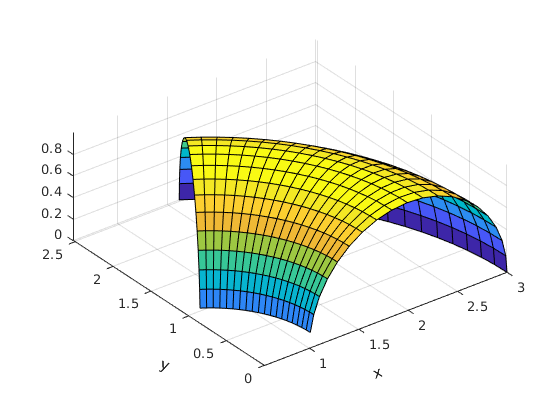

In [157]:
s_a = 0; s_b = 1;
s = linspace(s_a, s_b, 20);
t_a = 0; t_b = 3;
t = linspace(t_a, t_b, 20);
[ss, tt] = meshgrid(s, t);
x = (2 + cos(tt)).*cos(ss);
y = (2 + cos(tt)).*sin(ss);
z = sin(tt);
surf(x, y, z);axis equal; xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-20)

## Punti per l' interpolazione

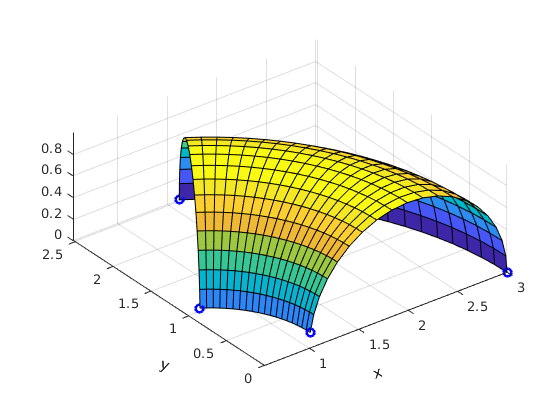

In [158]:
cx_1 = (2 + cos(t_a)).*cos(s_a);
cy_1 = (2 + cos(t_a)).*sin(s_a);
cz_1 = sin(t_a);

cx_2 = (2 + cos(t_b)).*cos(s_a);
cy_2 = (2 + cos(t_b)).*sin(s_a);
cz_2 = sin(t_b);

cx_3 = (2 + cos(t_b)).*cos(s_b);
cy_3 = (2 + cos(t_b)).*sin(s_b);
cz_3 = sin(t_b);

cx_4 = (2 + cos(t_a)).*cos(s_b);
cy_4 = (2 + cos(t_a)).*sin(s_b);
cz_4 = sin(t_a);

surf(x, y, z);axis equal; xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-20); hold on;
plot3(cx_1, cy_1, cz_1, 'bo--', 'linewidth', 2);
plot3(cx_2, cy_2, cz_2, 'bo--', 'linewidth', 2);
plot3(cx_3, cy_3, cz_3, 'bo--', 'linewidth', 2);
plot3(cx_4, cy_4, cz_4, 'bo--', 'linewidth', 2);

# Costruzione della matrice C

La matrice è data dai corne e dalle derivate parziali su s e t

In [189]:
syms s t f_x(s,t) f_y(s,t) f_z(s,t)

f_x(s,t) = (2 + cos(t)).*cos(s);
f_y(s,t) = (2 + cos(t)).*sin(s);
f_z(s,t) = sin(t);

df_xt = diff(f_x, t);
df_xs = diff(f_x, s);
df_xst = diff(f_x, s, t);

df_yt = diff(f_y, t);
df_ys = diff(f_y, s);
df_yst = diff(f_y, s, t);

df_zt = diff(f_z, t);
df_zs = diff(f_z, s);
df_zst = diff(f_z, s, t);


ans =

    'symfun'



## Matrice C piano X

In [221]:
C_x = zeros(4,4);
C_x(1,1) = f_x(s_a, t_a);
C_x(1,2) = df_xt(s_a, t_a);
C_x(2,1) = df_xs(s_a, t_a);
C_x(2,2) = df_xst(s_a, t_a);

C_x(1,4) = f_x(s_a, t_b);
C_x(1,3) = df_xt(s_a, t_b);
C_x(2,4) = df_xs(s_a, t_b);
C_x(2,3) = df_xst(s_a, t_b);

C_x(4,1) = f_x(s_b, t_a);
C_x(4,2) = df_xt(s_b, t_a);
C_x(3,1) = df_xs(s_b, t_a);
C_x(3,2) = df_xst(s_b, t_a);

C_x(4,4) = f_x(s_b, t_b);
C_x(4,3) = df_xt(s_b, t_b);
C_x(3,4) = df_xs(s_b, t_b);
C_x(3,3) = df_xst(s_b, t_b)

C_x = sym(C_x)


C_x =

    3.0000         0   -0.1411    1.0100
         0         0         0         0
   -2.5244         0    0.1187   -0.8499
    1.6209         0   -0.0762    0.5457

 
C_x =
 
[                                  3, 0, -5084384125703515/36028797018963968,  4548669415951639/4503599627370496]
[                                  0, 0,                                   0,                                  0]
[ -5684472620435891/2251799813685248, 0,  4278361717397373/36028797018963968, -3827573333006385/4503599627370496]
[  7299915790125521/4503599627370496, 0, -2747104467036975/36028797018963968,  2457656574070555/4503599627370496]
 


## Matrice C piano Y

In [161]:
C_y = zeros(4,4);C_y(1,1) = f_y(s_a, t_a);C_y(1,2) = df_yt(s_a, t_a);C_y(2,1) = df_ys(s_a, t_a);C_y(2,2) = df_yst(s_a, t_a);C_y(1,4) = f_y(s_a, t_b);C_y(1,3) = df_yt(s_a, t_b);C_y(2,4) = df_ys(s_a, t_b);C_y(2,3) = df_yst(s_a, t_b);C_y(4,1) = f_y(s_b, t_a);C_y(4,2) = df_yt(s_b, t_a);C_y(3,1) = df_ys(s_b, t_a);C_y(3,2) = df_yst(s_b, t_a);C_y(4,4) = f_y(s_b, t_b);C_y(4,3) = df_yt(s_b, t_b);C_y(3,4) = df_ys(s_b, t_b);C_y(3,3) = df_yst(s_b, t_b)


C_y =

         0         0         0         0
    3.0000         0   -0.1411    1.0100
    1.6209         0   -0.0762    0.5457
    2.5244         0   -0.1187    0.8499



## Matrice C piano Z

In [162]:
C_z = zeros(4,4);C_z(1,1) = f_z(s_a, t_a);C_z(1,2) = df_zt(s_a, t_a);C_z(2,1) = df_zs(s_a, t_a);C_z(2,2) = df_zst(s_a, t_a);C_z(1,4) = f_z(s_a, t_b);C_z(1,3) = df_zt(s_a, t_b);C_z(2,4) = df_zs(s_a, t_b);C_z(2,3) = df_zst(s_a, t_b);C_z(4,1) = f_z(s_b, t_a);C_z(4,2) = df_zt(s_b, t_a);C_z(3,1) = df_zs(s_b, t_a);C_z(3,2) = df_zst(s_b, t_a);C_z(4,4) = f_z(s_b, t_b);C_z(4,3) = df_zt(s_b, t_b);C_z(3,4) = df_zs(s_b, t_b);C_z(3,3) = df_zst(s_b, t_b)


C_z =

         0    1.0000   -0.9900    0.1411
         0         0         0         0
         0         0         0         0
         0    1.0000   -0.9900    0.1411



# Patch bicubico in forma di Hermite

$ X(s,t) = H^T(s)CH(t)$

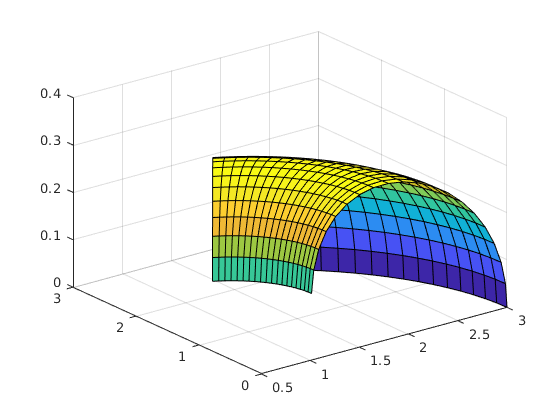

In [239]:
syms H_0_t(t) H_1_t(t) H_2_t(t) H_3_t(t) H_0_s(s) H_1_s(s) H_2_s(s) H_3_s(s)

H_0_t(t) = 1 - 3.*t.^2 + 2.*t.^3;
H_1_t(t) = t - 2*t.^2 + t.^3;
H_2_t(t) = t.^3 - t.^2;
H_3_t(t) = 3*t.^2 - 2*t.^3;

H_0_s(s) = 1 - 3*s.^2 + 2*s.^3;
H_1_s(s) = s - 2*s.^2 + s.^3;
H_2_s(s) = s.^3 - s.^2;
H_3_s(s) = 3*s.^2 - 2*s.^3;

H_t = [H_0_t(t); H_1_t(t); H_2_t(t); H_3_t(t)];
H_s = [H_0_s(s); H_1_s(s); H_2_s(s); H_3_s(s)];

X_st = symfun((H_s.') * C_x * H_t, [s,t]);
Y_st = symfun((H_s.') * C_y * H_t, [s,t]);
Z_st = symfun((H_s.') * C_z * H_t, [s,t]);

prec = 20;
X = zeros(prec, prec);
Y = zeros(prec, prec);
Z = zeros(prec, prec);

u = linspace(0, 1, prec);
v = linspace(0, 1, prec);

for i = 1:prec
    for j = 1:prec
        s = u(i); t = v(j);
        X(i,j) = X_st(u(i), v(j));
        Y(i,j) = Y_st(u(i), v(j));
        Z(i,j) = Z_st(u(i), v(j));
    end
end

surf(X,Y,Z);

## Conversione in forma di Bezier

In [243]:
B_x = zeros(4, 4);

%  Corner
B_x(1, 1) = C_x(1, 1);
B_x(1, 4) = C_x(1, 4);
B_x(4, 1) = C_x(4, 1);
B_x(4, 4) = C_x(4, 4);

dxs = diff(X_st, s);
dxt = diff(X_st, t);
dxst = diff(X_st, s, t);

B_x(1, 2) = C_x(1, 2)/3 + C_x(1, 1);
B_x(2, 1) = C_x(2, 1)/3 + C_x(1, 1);
B_x(2, 2) = C_x(2, 2)/9 + C_x(1, 1);

B_x(3, 1) = C_x(3, 1)/3 + C_x(3, 3);
B_x(4, 2) = C_x(4, 2)/3 + C_x(3, 3);
B_x(3, 2) = C_x(3, 2)/9 + C_x(3, 3);

B_x(1, 3) = C_x(1, 3)/3 + C_x(4, 1);
B_x(2, 4) = C_x(2, 4)/3 + C_x(4, 1);
B_x(2, 3) = C_x(2, 3)/9 + C_x(4, 1);

B_x(3, 4) = C_x(3, 4)/3 + C_x(4, 4);
B_x(4, 3) = C_x(4, 3)/3 + C_x(4, 4);
B_x(3, 3) = C_x(3, 3)/9 + C_x(4, 4)


B_x =

    3.0000    0.0842         0    1.0100
         0         0         0         0
         0         0         0         0
    1.6209         0         0    0.5457


B_x =

    3.0000    0.0842    1.5739    1.0100
    3.0000    3.0000    1.6209    1.6209
   -0.7227    0.1187    0.5589    0.2624
    1.6209    0.1187    0.5203    0.5457



## Punti di controllo Y

In [15]:
B_y = zeros(4, 4); B_y(1, 1) = C_y(1, 1);B_y(1, 4) = C_y(1, 4);B_y(4, 1) = C_y(4, 1);B_y(4, 4) = C_y(4, 4);B_y(1, 2) = C_y(1, 2)/3 + C_y(1, 1);B_y(2, 1) = C_y(2, 1)/3 + C_y(1, 1);B_y(2, 2) = C_y(2, 2)/9 + C_y(1, 1);B_y(3, 1) = C_y(3, 1)/3 + C_y(3, 3);B_y(4, 2) = C_y(4, 2)/3 + C_y(3, 3);B_y(3, 2) = C_y(3, 3)/9 + C_y(3, 3);B_y(1, 3) = C_y(1, 3)/3 + C_y(4, 1);B_y(2, 4) = C_y(2, 4)/3 + C_y(4, 1);B_y(2, 3) = C_y(2, 3)/9 + C_y(4, 1);B_y(3, 4) = C_y(3, 4)/3 + C_y(4, 4);B_y(4, 3) = C_y(4, 3)/3 + C_y(4, 4);B_y(3, 3) = C_y(3, 3)/9 + C_y(4, 4)


B_y =

         0         0    2.5244         0
    1.0000         0    2.5087    2.8611
    0.4641   -0.0847    0.8414    1.0318
    2.5244   -0.0762    0.8103    0.8499



## Punti di controllo Z

In [16]:
B_z = zeros(4, 4);B_z(1, 1) = C_z(1, 1);B_z(1, 4) = C_z(1, 4);B_z(4, 1) = C_z(4, 1);B_z(4, 4) = C_z(4, 4);B_z(1, 2) = C_z(1, 2)/3 + C_z(1, 1);B_z(2, 1) = C_z(2, 1)/3 + C_z(1, 1);B_z(2, 2) = C_z(2, 2)/9 + C_z(1, 1);B_z(3, 1) = C_z(3, 1)/3 + C_z(3, 3);B_z(4, 2) = C_z(4, 2)/3 + C_z(3, 3);B_z(3, 2) = C_z(3, 3)/9 + C_z(3, 3);B_z(1, 3) = C_z(1, 3)/3 + C_z(4, 1);B_z(2, 4) = C_z(2, 4)/3 + C_z(4, 1);B_z(2, 3) = C_z(2, 3)/9 + C_z(4, 1);B_z(3, 4) = C_z(3, 4)/3 + C_z(4, 4);B_z(4, 3) = C_z(4, 3)/3 + C_z(4, 4);B_z(3, 3) = C_z(3, 3)/9 + C_z(4, 4)


B_z =

         0    0.3333   -0.3300    0.1411
         0         0         0         0
         0         0    0.1411    0.1411
         0    0.3333   -0.1889    0.1411



In [112]:
syms  B_0_t B_1_t B_2_t B_3_t B_0_s B_1_s B_2_s B_3_s XB_st YB_st ZB_st s t
B_0_t = (1 - t).^3;
B_1_t = 3*t*(1 - t).^2;
B_2_t = 3*t.^2*(1 - t);
B_3_t = t.^3;

B_0_s = (1 - s).^3;
B_1_s = 3*s*(1 - s).^2;
B_2_s = 3*s.^2*(1 - s);
B_3_s = s.^3;

B_t = [B_0_t; B_1_t; B_2_t; B_3_t];
B_s = [B_0_s; B_1_s; B_2_s; B_3_s];

XB_st = (B_s.') * B_x * B_t;
YB_st = (B_s.') * B_y * B_t;
ZB_st = (B_s.') * B_z * B_t;

% prec = 10;
% X = zeros(prec, prec);
% Y = zeros(prec, prec);
% Z = zeros(prec, prec);

% u = linspace(0, 1, prec);
% v = linspace(0, 1, prec);
% for i = 1:prec
%     for j = 1:prec
%         s = u(i); t = v(j);
%         X(i,j) = double(subs(X_st));
%         Y(i,j) = double(subs(Y_st));
%         Z(i,j) = double(subs(Z_st));
%     end
% end

% surf(X,Y,Z);axis equal;hold on;
% plot3(B_x, B_y, B_z, 'bo--', 'linewidth', 2); hold on;


ans =

    1.9541


ans =

    1.7308

 
X_dst =
 
(- 2*t^3 + 3*t^2)*((354452350755783*s^3)/4503599627370496 - (2445465192636867*s^2)/4503599627370496 + 4548669415951639/4503599627370496) + (- t^3 + t^2)*((396197599935707*s^3)/36028797018963968 - (2733477258602247*s^2)/36028797018963968 + 5084384125703515/36028797018963968) + (2*t^3 - 3*t^2 + 1)*((131602617887519*s^3)/562949953421312 - (7263704035086119*s^2)/4503599627370496 + 3)
 
